# 構造体やクラスの変数

ここでは、いくつかの変数をまとめることのできる構造体やクラスの変数について説明します。

## 変数の型の種類

各プログラミング言語で扱える変数の型としては大きく以下の2つがあります。

- プリミティブ型
- プリミティブ型以外

プリミティブ型とは、プログラミング言語に組み込み済みの数値や文字列（一部言語では文字列もプリミティブではないこともある）の型です。  
主に以下のようなものがあります。

### プリミティブ型

- 整数型
  - javaやC++：short / int / long
  - VBA： Short / Integer / Long
  - C++：char
  - 符号なし整数。C++：unsigned int、VBA：ULong など
- 浮動小数点型
  - javaやC++：float / double
  - VBA: Double
- 10進数型
  - VBA：Decimal

### 構造体やクラス

ほとんどのプログラム言語には、複数の変数をまとめて定義できる構造体やクラスの概念があります。

**例として平面座標の `(x, y)` を管理する構造体やクラスの定義は以下となります。**

例）java

```java
public class MyPoint {
    public double x;
    public double y;
}
```

例）C/C++

```c++
struct MyPoint {
    double x;
    double y;
};
```

例）VBA

```vbscript
Public Type MyPoint
    x As Double
    y As Double
End Type
```

プログラムを作っていると、このように新しいデータ構造として構造体やクラスを使う場面が出てきます。  
次からは、これら構造体はクラスの仕組みを説明します。

## 構造体やクラスのメモリ管理

構造体やクラスをプログラム内で使うと、その定義の中に含まれているすべての変数分のメモリが必要となります。

前述の `MyPoint` の例では、double型の x, y 2つ分のメモリが最低限必要となります。

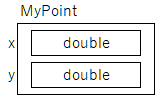

おおむね `double[2]` と同等のメモリが必要です。

また、プログラミング言語によっては、構造体やクラスに関連する情報や、後述するアライメントにより、もっとメモリを使うかもしれません。  
メモリをより使う可能性があるからといって、構造体やクラスを使わない方がいいと言っているわけではなく、より効率的で見やすいプログラムを作るためにも積極的に使うべきです。

### static変数

いくつかのプログラム言語では、クラスの中に static 変数を記述できます。

例）java

```java
public class MyPoint {
    public static int count;
    public double x;
    public double y;
}
```

例）C/C++

```c++
struct MyPoint {
    static int count;
    double x;
    double y;
};
```

上記のような static 変数は、この構造体のメモリサイズには含まれず、グローバル変数のように別途変数用のメモリエリアが作成されます。

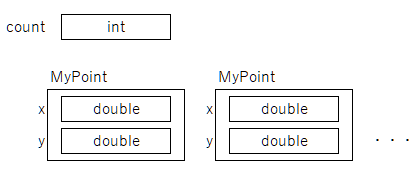

構造体の中に新たに `static int count` という変数が増えていますが、static変数が増えただけでは構造体が必要とするメモリサイズは変化しません。  
`static`が付いていない普通の変数は、この構造体/クラスが定義されるたびにメモリ確保される部分であり、別変数であれば別の値を持つことが出来ます。  
しかし `static` 変数は、構造体/クラスをいくつ作っても、あるいはまったく作らなくても、共有のものとして1つだけ存在します。

このように、`static`のついていない変数は、構造体/クラスが作られる（インスタンス化される）たびにメモリを確保するため、インスタンス変数と呼ばれることがあります。  
逆に、`static`のついている変数は、static変数やクラス変数と呼ばれます。

## C/C++でのアライメント

C/C++のプリミティブ型は、それぞれで必要なメモリサイズが異なります。

|型|バイト数|
|---|---|
|char|1|
|short|2|
|int|4|
|long|8|
|float|4|
|double|8|

それぞれの型の変数がメモリ上に配置される際には、必ず上記のバイト数の倍数のアドレスとなります。

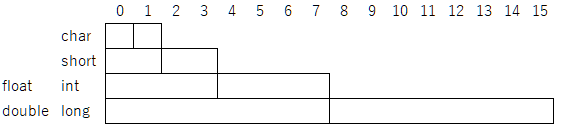

`char`であれば、1バイトのためどのアドレスでも問題ありませんが、`int`の4バイトだと、必ず4の倍数のアドレスに変数を配置する必要があります。  
このアライメントは、定義した構造体の大きさを決めることになります。

### 構造体でのアライメント

例えば、以下の2つの構造体定義があったとします。

```c++
struct MyData1 {
    char a;
    short b;
    char c;
    int d;
    long e;
};

struct MyData2 {
    char a;
    char c;
    short b;
    int d;
    long e;
};
```

両社の違いは、`b` と `c` の定義順だけです。  
これによって、各構造体の大きさは以下のように変わります。

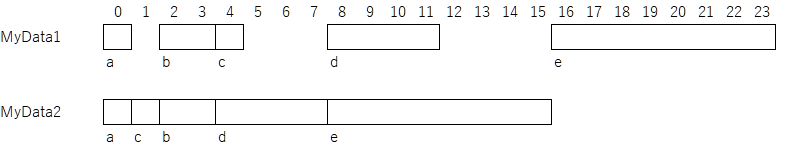

構造体内に定義している各変数の型が必要としているバイト数があり、各変数は必要バイト数の倍数になる位置にメモリ配置されるように調整されます。  
このように、変数が型に応じた正しい位置へ配置されるように調整されることをアライメントといいます。

このようなアライメントは、構造体やクラスで発生するだけではなく、関数内の変数定義（オート変数）でも発生します。

```c++
void myfunc() {
    char a;  // どのアドレスでもOK
    short b; // 2の倍数アドレスに配置
    int c;   // 4の倍数アドレスに配置
    long d;  // 8の倍数アドレスに配置
}
```

ただ、オート変数については、コンパイラが最適化のために、無駄なメモリが発生しないように入れ替えているかもしれません。

### アライメントずれによるバスエラー

C/C++言語では、ポインタを利用することで、このアライメントを無視したコーディングは可能です。

```c++
void myfunc() {
    char buf[256];
    long* v = (long*)(buf + 3);  // 本来8の倍数にしないとならないが、キャストで強引に倍数からずらしている
    
    *v = 100;
}
```

上記は、本来 long なら8の倍数のアドレスに配置したメモリを使わないとならないですが、キャストを使って強引にずらしています。  
一部のCPUでは、このようなアライメントのずれたアクセスをすると「バスエラー」でコアダンプすることもあります。  

なぜアライメントが必要かというと、一般的なCPUの実装として、メモリアクセスにおいて 8bit, 16bit, 32bit, 64bit ごとに読み書き用の命令が異なっており、それら命令をアライメントに従った倍数アドレス以外で行うとバスエラーになるというものがあるからです。  
メモリ読み書きは、バスを経由してCPUとメモリがやり取りすることになりますが、16bitの情報を1回でやり取りするには16bitの倍数アドレス、32bitの情報を1回でやり取りするには32bitの倍数アドレスという実装となっており、それが守られていないとバス上でエラーが発生してしまいます。

もちろん、CPUによってはこのような現象が発生しないものがあります。  
ただ、効率よい実行を行うためにも、アライメントを守ったプログラミングが望ましいです。